In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df = df.drop(['MiscFeature', 'Alley', 'PoolQC', 'Fence','LotFrontage', 'FireplaceQu' ], axis = 1)
df = df.dropna()

### Model 1

In [4]:
X = df[['LotArea','MoSold', 'PoolArea', 'OverallQual', 'GarageCars', 'WoodDeckSF',
        'YearRemodAdd','ScreenPorch', 'MiscVal','Fireplaces','GrLivArea','TotalBsmtSF', 'YrSold']]
Y = df.SalePrice
X.head()

,LotArea,MoSold,PoolArea,OverallQual,GarageCars,WoodDeckSF,YearRemodAdd,ScreenPorch,MiscVal,Fireplaces,GrLivArea,TotalBsmtSF,YrSold
0,8450,2,0,7,2,0,2003,0,0,0,1710,856,2008
1,9600,5,0,6,2,298,1976,0,0,1,1262,1262,2007
2,11250,9,0,7,2,0,2002,0,0,1,1786,920,2008
3,9550,2,0,7,3,0,1970,0,0,1,1717,756,2006
4,14260,12,0,8,3,192,2000,0,0,1,2198,1145,2008


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 123)

lrm = LinearRegression()
lrm.fit(x_train, y_train)

y_train_predict = lrm.predict(x_train)
y_test_predict = lrm.predict(x_test)

print('Eğitim kümesindeki gözlem sayısı: {}'.format(x_train.shape[0]))
print('Test kümesindeki gözlem sayısı: {}'.format(x_test.shape[0], '\n'))

print('Eğitim kümesindeki R-Kare değeri: {}'.format(lrm.score(x_train, y_train)))
print('---Test kümesi istatistikleri:---\n')
print('Test kümesi R-Kare değeri: {}'.format(lrm.score(x_test, y_test)))
print('Ortalama Mutlak Hata(MAE): {}'.format(mean_absolute_error(y_test, y_test_predict)))
print('Ortalama Kare Hata(MSE): {}'.format(mse(y_test, y_test_predict)))
print('Kök Ortalama Kare Hata: {}'.format(rmse(y_test, y_test_predict)))
print('Ortalama Mutlak Yüzde Hata: {}'.format(np.mean(np.abs((y_test - y_test_predict) / y_test)) * 100))


Eğitim kümesindeki gözlem sayısı: 1070
Test kümesindeki gözlem sayısı: 268
Eğitim kümesindeki R-Kare değeri: 0.8127006694985668
---Test kümesi istatistikleri:---

Test kümesi R-Kare değeri: 0.4170317874538987
Ortalama Mutlak Hata(MAE): 26423.839644511612
Ortalama Kare Hata(MSE): 2729352640.21523
Kök Ortalama Kare Hata: 52243.20664177525
Ortalama Mutlak Yüzde Hata: 16.079094493181145


Buraya kadar modelimiz gereksiz bir şekilde karmaşık oluşturduk. Amacımız overfitting'i eğitim ve test kümelerinin R-kare değerlerinin farkı üzerinden göstermekti. Yaklaşık 0.40, yani yüzde 40'lık bir fark görüyoruz. Bu, modelimizin overfit tahminlerde bulunduğunu ve gerçek hayatta başarılı tahminler yapamayacağını gösteriyor. Şimdi bazı yöntemlerle bunu düzeltmeye çalışacağız.

### Regülerizasyon

Modelimizin katsayılarının büyüklüklerini kontrol edelim.

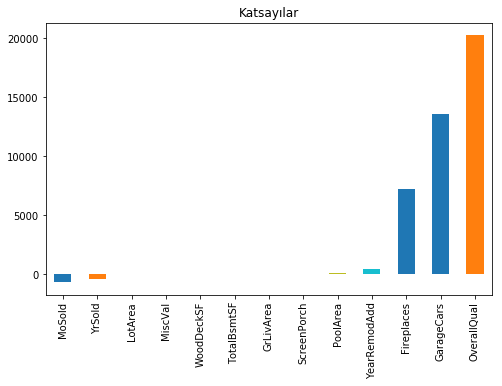

In [30]:
plt.figure(figsize = (8,5))
lreg = LinearRegression()
lreg.fit(x_train, y_train)
predictors = x_train.columns
coef = pd.Series(lreg.coef_ , predictors).sort_values()
coef.plot(kind = 'bar', title = 'Katsayılar')
plt.show()

### Ridge Regresyonu

MSE: 1806104390.3472466
R-Squared: 0.6142303370408848


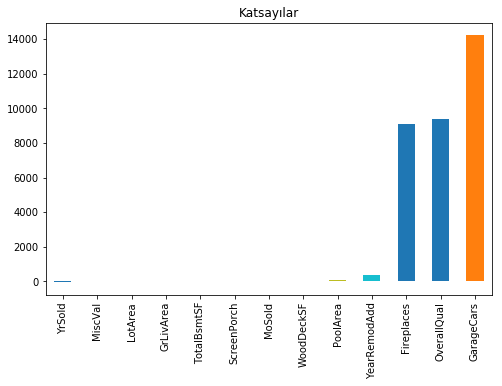

In [7]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha = 2.13, normalize = True)
ridgeReg.fit(x_train, y_train)
pred = ridgeReg.predict(x_test)
predictors = x_train.columns
plt.figure(figsize = (8,5))

coef = pd.Series(ridgeReg.coef_ , predictors).sort_values()
coef.plot(kind = 'bar', title = 'Katsayılar')
print('MSE:', mse(y_test, pred))
print('R-Squared:', ridgeReg.score(x_test, y_test))

### Lasso Regresyonu

MSE: 1645311768.77247
R-Squared: 0.6485743737215599


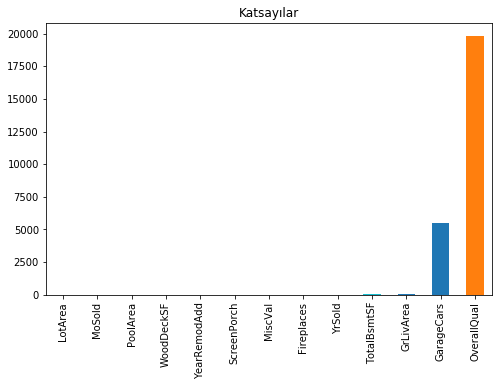

In [27]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha = 600, normalize = True)
lassoReg.fit(x_train, y_train)
pred2 = lassoReg.predict(x_test)

predictors = x_train.columns
coeff = pd.Series(lassoReg.coef_, predictors).sort_values()
plt.figure(figsize = (8,5))
coeff.plot(kind = 'bar', title = 'Katsayılar')
print('MSE:', mse(y_test, pred2))
print('R-Squared:', lassoReg.score(x_test, y_test))

### Elastic Net Regresyonu

MSE: 2729352640.214704
R-Squared: 0.41703178745401104


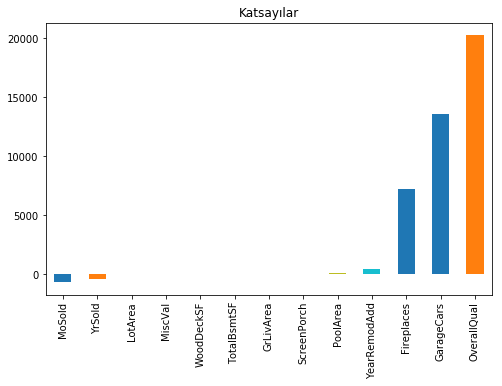

In [32]:
from sklearn.linear_model import ElasticNet
ENreg = ElasticNet(alpha = 0, l1_ratio = 0.5, normalize = False)
ENreg.fit(x_train, y_train)
pred_elastic = ENreg.predict(x_test)

print('MSE:', mse(y_test, pred_elastic))
print('R-Squared:', ENreg.score(x_test, y_test))
plt.figure(figsize = (8,5))
coeff2 = pd.Series(ENreg.coef_, predictors).sort_values()
coeff2.plot(kind = 'bar', title = 'Katsayılar')
plt.show()

### Sonuç

Modelimiz oluşturuldu. Ardından performansa dair hatalar, test ve eğitim kümesi r-kare farkları gibi bazı parametreler incelendi. Pek de iyi bir performans vermediği görüldü.

Daha sonra eğitim ve test kümesi arasındaki farkın sebebi olan overfitting, yani aşırı uyumluluk, bazı regülerizasyon yöntemleri denenerek iyileştirilmeye çalışıldı.

Test kümesi eğitim kümesinin %20'si olacak şekilde seçildi.

Ridge, Lasso ve ElasticNet regresyonlarını modelimize uyguladık. Bu modeller için ciddi önem arzeden alpha(lambda) parametrelerini deneme yanılma yöntemiyle en iyi r-kare değerini verecek hale getirdik. 

Bu üç regresyon sonucunda, bu model için aşırı uyumluluğu gidermede en faydalı olan regülerizasyon tekniğinin Lasso regresyonu olduğu sonucuna vardık. Ridge regresyonu da Lasso'ya oldukça yakın sonuçlar verdi. Ancak elasticnet ile neredeyse hiçbir iyileşme yakalayamadık. 